# 1- Basic Pandas usage 

Start by importing pandas. We'll also import random as we'll be generating some data points later on.

In [2]:
import pandas as pd
import random

Let's start by creating a ```dataframe``` from a dictionary.  Let's initialize this dictionary with some Lennard-Jones fitting parameters for alkanes from opls.

In [3]:
lj_dict = {'name' : ['opls_135', 'opls_136', 'opls_140'],
           'element' : ['C', 'C', 'H'],
           'def' : ['[C;X4](C)(H)(H)H', '[C;X4](C)(C)(H)H', 'H[C;X4]'],
           'epsilon' : [0.35,0.35,0.25],
           'sigma' : [0.276144,0.276144,0.12552],
           'charge' : [-0.18,-0.12,0.06]
}

lj_df = pd.DataFrame(lj_dict)

Simply calling the dataframe provides a nicely formatted table in jupyter; using '''print''' outputs the same data, but in a monospaced type format.

In [4]:
lj_df

,name,element,def,epsilon,sigma,charge
0,opls_135,C,[C;X4](C)(H)(H)H,0.35,0.276144,-0.18
1,opls_136,C,[C;X4](C)(C)(H)H,0.35,0.276144,-0.12
2,opls_140,H,H[C;X4],0.25,0.125520,0.06


In [5]:
print(lj_df)

       name element               def  epsilon     sigma  charge
0  opls_135       C  [C;X4](C)(H)(H)H     0.35  0.276144   -0.18
1  opls_136       C  [C;X4](C)(C)(H)H     0.35  0.276144   -0.12
2  opls_140       H           H[C;X4]     0.25  0.125520    0.06


One can easily index the dataframe. If we index using single square brackets it returns the series, whereas if we do double square brackets we get a Pandas dataframe (this difference is obvious in Jupyter notebooks, because the dataframe will be rendered in a nicer format).   

In the case below, we will just get all data in the column associated with the label name.

In [6]:
lj_df['name']

0    opls_135
1    opls_136
2    opls_140
Name: name, dtype: object

In [7]:
type(lj_df['name'])

pandas.core.series.Series

In [8]:
lj_df[['name']]

,name
0,opls_135
1,opls_136
2,opls_140


In [9]:
type(lj_df[['name']])

pandas.core.frame.DataFrame

Simple logical operations can be performed and then used to extract the individual row (i.e., series) of interest.

In [10]:
lj_df['name'] == 'opls_135'

0     True
1    False
2    False
Name: name, dtype: bool

In [11]:
lj_df[lj_df['name'] == 'opls_135']

,name,element,def,epsilon,sigma,charge
0,opls_135,C,[C;X4](C)(H)(H)H,0.35,0.276144,-0.18


The numerical index can also be used to extract a specific row.

In [12]:
lj_df[0:1]

,name,element,def,epsilon,sigma,charge
0,opls_135,C,[C;X4](C)(H)(H)H,0.35,0.276144,-0.18


The ```iloc``` command can also be used to index a specific row.

In [13]:
lj_df.iloc[0]

name               opls_135
element                   C
def        [C;X4](C)(H)(H)H
epsilon                0.35
sigma              0.276144
charge                -0.18
Name: 0, dtype: object

After identifying the row of interest, the column labels can be used to index the data.

In [14]:
lj_df[lj_df['name'] == 'opls_135']['def']

0    [C;X4](C)(H)(H)H
Name: def, dtype: object

In [15]:
lj_df[0:1]['def']

0    [C;X4](C)(H)(H)H
Name: def, dtype: object

In [16]:
lj_df.iloc[0]['def']

'[C;X4](C)(H)(H)H'

In [17]:
lj_df.iloc[0][2]

'[C;X4](C)(H)(H)H'

Let's do something slightly useful with this data, e.g., plotting the LJ potentials, taking advantage of the indexing.

In [18]:
import matplotlib
from matplotlib import pyplot as plt


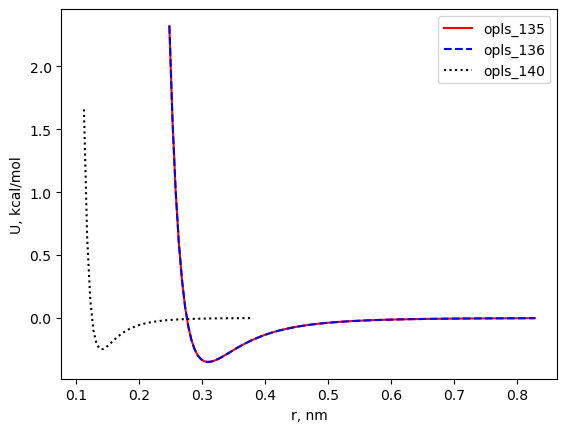

In [19]:
def LJ(epsilon=1.0, sigma=1.0, dr=0.005, rmin=0.9):
    r = rmin
    while 1:
        U = 4.0*epsilon*((sigma/r)**12 - (sigma/r)**6)
        yield U,r
        r = r + dr

color = ['red', 'blue', 'black']
line = ['-', '--', ':']

empty = {}
for i in range(0,len(lj_df)):
    pot = []
    dist = []
    for U,r in LJ(epsilon=lj_df.iloc[i]['epsilon'], sigma=lj_df.iloc[i]['sigma'], rmin=0.9*lj_df.iloc[i]['sigma']):
        pot.append(U)
        dist.append(r)
        if r > 3.0*lj_df.iloc[i]['sigma']:            
            break
    
    plt.plot(dist,pot,label=lj_df.iloc[i]['name'],c=color[i], ls=line[i])
    plt.legend(loc='upper right')
    plt.xlabel('r, nm')
    plt.ylabel('U, kcal/mol')




## Examining dataframes

One advantage of using pandas over just a dictionary is that there are many built-in functions to quickly summarize the data, which is especially useful for larger datasets. For example, ```info()``` will give us more info about each column.

In [20]:
lj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     3 non-null      object 
 1   element  3 non-null      object 
 2   def      3 non-null      object 
 3   epsilon  3 non-null      float64
 4   sigma    3 non-null      float64
 5   charge   3 non-null      float64
dtypes: float64(3), object(3)
memory usage: 272.0+ bytes


In [21]:
lj_df.shape

(3, 6)

The ```describe``` function will provide a quick statistical analysis of each column (or well, at least each column with numbers). For the lj parameter data it isn't very meaningful, so we can quickly create some data that could represent energy sampled at different times during a simulation trajectory to demonstrate describe.  The code below will generate random data points for U with mean 3 and standard deviation 0.7.  Note we will use the ```head``` function to quickly examine the dataframe; this prints the first 5 entries.

In [22]:
data_dict = {'time': [], 'U': [], 'Q': []}
r = 0.9
 
for i in range (0,100):
    rand_val = random.gauss(mu=3.0, sigma=0.7)
    data_dict['U'].append(rand_val)
    data_dict['Q'].append(rand_val*random.gauss(mu=1.0, sigma=0.1))
    data_dict['time'].append(i*0.5)
data_df = pd.DataFrame(data_dict)

In [23]:
data_df.head()

,time,U,Q
0,0.0,3.470037,3.378471
1,0.5,3.001507,3.709045
2,1.0,3.320277,3.016544
3,1.5,3.707929,3.779304
4,2.0,2.266192,2.351314


In [24]:
data_df.describe()

,time,U,Q
count,100.000000,100.000000,100.000000
mean,24.750000,3.045699,3.053682
std,14.505746,0.737517,0.815003
min,0.000000,0.983867,1.099362
25%,12.375000,2.544527,2.508252
50%,24.750000,2.973190,2.975517
75%,37.125000,3.443208,3.537412
max,49.500000,4.978827,5.386896


The ```describe``` function can be restricted to an individual column.

In [25]:
data_df[['U']].describe()

,U
count,100.000000
mean,3.045699
std,0.737517
min,0.983867
25%,2.544527
50%,2.973190
75%,3.443208
max,4.978827


We can quickly plot the data within the dataframes, including the ability to quickly generate histograms. These are just matplotlib plots and can be easily manipulated in the standard ways.

Text(0.5, 0, 'time')

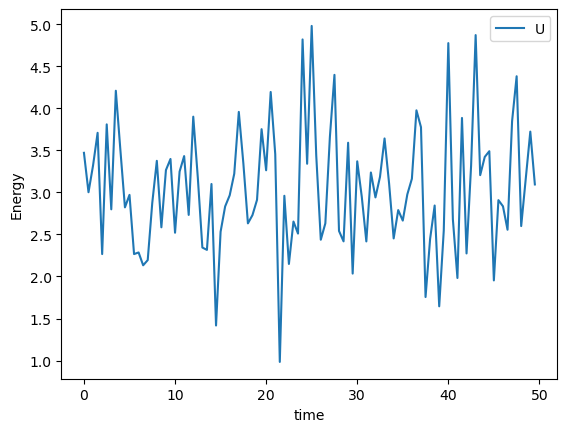

In [26]:
ax = data_df.plot(x='time', y='U')
ax.set_ylabel('Energy')
ax.set_xlabel('time')

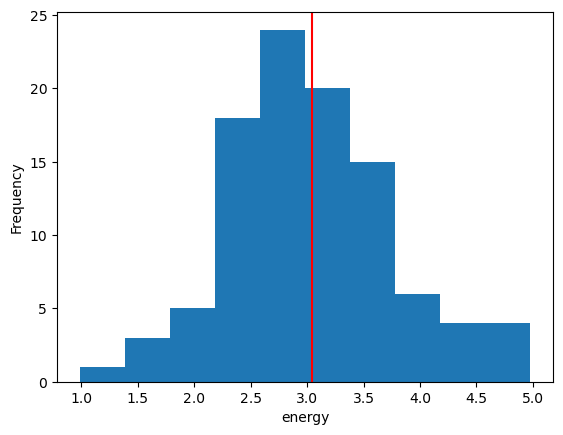

In [29]:
ax = data_df['U'].plot(kind='hist')
ax.set_xlabel("energy")
ax.axvline(data_df['U'].mean(), color='red')

Pandas also makes it easy to quickly see if correlations exist.  Here, we generated a column Q that should be highly correlated with U. 

In [31]:
data_df.corr()

,time,U,Q
time,1.000000,0.05967,0.058615
U,0.059670,1.00000,0.921580
Q,0.058615,0.92158,1.000000


## Reading and writing CSV files
Let us use the energy data as a function of time to demonstrate reading and writing to CSV files.

In [32]:
data_df

,time,U,Q
0,0.0,3.470037,3.378471
1,0.5,3.001507,3.709045
2,1.0,3.320277,3.016544
3,1.5,3.707929,3.779304
4,2.0,2.266192,2.351314
...,...,...,...
95,47.5,4.380415,5.080337
96,48.0,2.599171,2.619319
97,48.5,3.161708,3.497994
98,49.0,3.722222,3.538909


To save to csv, we can just use the built in ```to_csv``` function.

In [33]:
data_df.to_csv('random_data.csv', index=False)

Reading a csv file is effectively the same. Since we did not write an index column, pandas will automatically generate one based on the numerical index of the line. 

In [34]:
data_read_df = pd.read_csv('random_data.csv')

In [35]:
data_read_df

,time,U,Q
0,0.0,3.470037,3.378471
1,0.5,3.001507,3.709045
2,1.0,3.320277,3.016544
3,1.5,3.707929,3.779304
4,2.0,2.266192,2.351314
...,...,...,...
95,47.5,4.380415,5.080337
96,48.0,2.599171,2.619319
97,48.5,3.161708,3.497994
98,49.0,3.722222,3.538909
